# Installation and importing of libraries

In [ ]:
!pip install plotly scikit-learn seaborn scanpy pydeseq2

In [ ]:
import plotly.io as pio
pio.renderers.default='notebook'

In [ ]:
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import spearmanr

import seaborn as sns
import scanpy as sc
import matplotlib.pyplot as plt
import plotly.express as px

import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

# Download CpGs data

In [ ]:
expr_list=['GSE42861_expressions.csv',
 'GSE41169_expressions.csv',
 'GSE51032_expressions.csv',
 'GSE36054_expressions.csv',
 'GSE30870_expressions.csv',
 # 'GSE51057_expressions.csv', #- included in GSE51032_expressions
 'GSE52588_expressions.csv',
 'GSE73103_expressions.csv',
 'GSE64495_expressions.csv',
 'GSE69270_expressions.csv']

metaexpr=pd.DataFrame()
for cohort in expr_list:
    print(cohort)
    df = pd.read_csv(os.path.join('./expr',cohort), index_col='ID_REF').T
    # print(cohort, df.index[:10])
    # df=df.drop_duplicates()
    if metaexpr.empty:
        metaexpr = df

    else:
        if set(df.index)<= set(metaexpr.index):
            print('!!!', cohort, df.index[:10])
        metaexpr=pd.concat([metaexpr, df])
        metaexpr=metaexpr.dropna(axis=1)
        metaexpr=metaexpr.reset_index()
        i=metaexpr.reset_index()[['index']].drop_duplicates().index
        metaexpr=metaexpr.iloc[i].set_index('index')


GSE42861_expressions.csv
GSE41169_expressions.csv
GSE51032_expressions.csv
GSE36054_expressions.csv
GSE30870_expressions.csv
GSE52588_expressions.csv
GSE73103_expressions.csv
GSE64495_expressions.csv


Since GSE51057 is a subset of GSE51032, I've removed the GSE51057 data to prevent duplication

In [ ]:
ann=pd.read_csv('metaannot.csv', index_col='GSM')
ann = ann[ann['cohort']!='GSE51057_expressions.csv']
todel=ann[ann['group']=='Ctrl'].index
todel

Index(['GSM879994', 'GSM880012', 'GSM880019', 'GSM880037', 'GSM880046',
       'GSM880064', 'GSM880071', 'GSM880089', 'GSM880090', 'GSM880108',
       'GSM880115', 'GSM880133', 'GSM880140', 'GSM880158', 'GSM880165',
       'GSM880183'],
      dtype='object', name='GSM')

In [ ]:
ann = ann.drop(index=todel)
metaexpr = metaexpr.drop(index=todel)

In [ ]:
result = pd.merge(metaexpr.dropna(axis=1) , ann, how="left", left_index=True, right_index=True)
result = result[result['cohort_type'].notna()]
result=result.dropna(axis=1)
result

,cg00000957,cg00001583,cg00003287,cg00021933,cg00026222,cg00027570,cg00038675,cg00040446,cg00113194,cg00114008,...,cg27523577,cg27528247,cg27552198,cg27575890,cg27598806,cg27634071,cg27657363,cg27657537,cohort,cohort_type
index,,,,,,,,,,,,,,,,,,,,,
GSM1051525,0.870997,0.121106,0.210955,0.903692,0.090213,0.636357,0.649931,0.055412,0.828086,0.123508,...,0.336073,0.808012,0.872007,0.423205,0.873601,0.096663,0.777684,0.105685,GSE42861_annot.csv,leiko
GSM1051526,0.873762,0.088960,0.244844,0.908856,0.084529,0.573933,0.648017,0.065712,0.823899,0.118023,...,0.344591,0.805337,0.888213,0.424718,0.871823,0.083777,0.801834,0.119247,GSE42861_annot.csv,leiko
GSM1051527,0.859750,0.072046,0.209858,0.883683,0.086311,0.768327,0.708501,0.059934,0.841061,0.107615,...,0.329990,0.836789,0.856068,0.383205,0.878550,0.096869,0.762175,0.099923,GSE42861_annot.csv,leiko
GSM1051528,0.870620,0.103984,0.209724,0.912712,0.081393,0.571648,0.666859,0.074976,0.851469,0.127926,...,0.365057,0.827779,0.866548,0.405542,0.882510,0.120769,0.773367,0.093272,GSE42861_annot.csv,leiko
GSM1051529,0.855005,0.067412,0.197101,0.912549,0.077056,0.535395,0.546480,0.068813,0.838024,0.106273,...,0.364775,0.798188,0.849016,0.453249,0.870242,0.107000,0.809349,0.127895,GSE42861_annot.csv,leiko
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1696559,0.862173,0.121746,0.229645,0.900595,0.101911,0.661503,0.681901,0.172433,0.841499,0.217710,...,0.398303,0.888567,0.907604,0.447396,0.925008,0.111375,0.790484,0.095405,GSE69270_annot.csv,leiko
GSM1696560,0.877805,0.124107,0.233930,0.901221,0.100301,0.553750,0.605686,0.151430,0.851125,0.185316,...,0.377225,0.890274,0.914752,0.483113,0.932403,0.055779,0.835091,0.095244,GSE69270_annot.csv,leiko
GSM1696561,0.864876,0.142773,0.209686,0.907220,0.103948,0.494285,0.532332,0.162553,0.852686,0.182035,...,0.435508,0.885341,0.937708,0.499933,0.944493,0.197504,0.856961,0.127391,GSE69270_annot.csv,leiko


Check data for NaN values

In [ ]:
all(result['cohort_type'].notna())


True

In [ ]:
result['CohName'] = result['cohort'].str[:8]
result['cohort_ty2'] = result['cohort_type']

# Exploring the batch effect

In [ ]:
dds = DeseqDataSet(
    counts=np.round(result.drop(columns=['cohort','cohort_type','CohName','cohort_ty2'])*100),
    metadata=result[['CohName','cohort_type','cohort_ty2']],
    design_factors="cohort_ty2",
    refit_cooks=True)

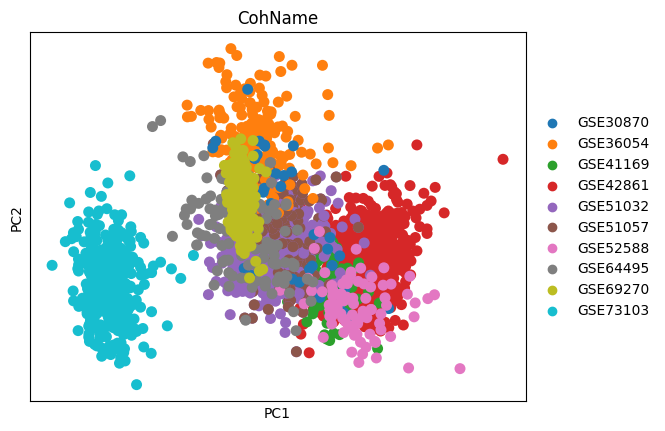

In [ ]:
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'CohName', size = 250)

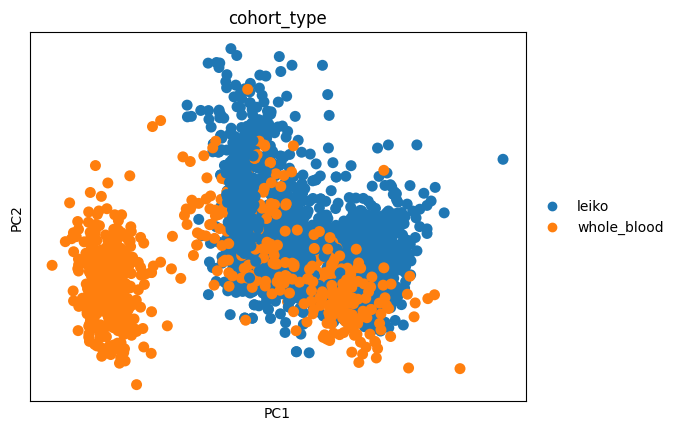

In [ ]:
sc.tl.pca(dds)
sc.pl.pca(dds, color = 'cohort_type', size = 250)

In our upcoming work, we will exclusively utilize PBMC (peripheral blood mononuclear cell) CpG data, denoted as 'leiko' in the metaannotation file. Therefore, it's advisable to create a subset containing only the necessary data

## PCA for PBMC data

In [ ]:
result_leik = result[result['cohort_type']=='leiko']

In [ ]:
result_leik

,cg00000957,cg00001583,cg00003287,cg00021933,cg00026222,cg00027570,cg00038675,cg00040446,cg00113194,cg00114008,...,cg27552198,cg27575890,cg27598806,cg27634071,cg27657363,cg27657537,cohort,cohort_type,CohName,cohort_ty2
index,,,,,,,,,,,,,,,,,,,,,
GSM1051525,0.870997,0.121106,0.210955,0.903692,0.090213,0.636357,0.649931,0.055412,0.828086,0.123508,...,0.872007,0.423205,0.873601,0.096663,0.777684,0.105685,GSE42861_annot.csv,leiko,GSE42861,leiko
GSM1051526,0.873762,0.088960,0.244844,0.908856,0.084529,0.573933,0.648017,0.065712,0.823899,0.118023,...,0.888213,0.424718,0.871823,0.083777,0.801834,0.119247,GSE42861_annot.csv,leiko,GSE42861,leiko
GSM1051527,0.859750,0.072046,0.209858,0.883683,0.086311,0.768327,0.708501,0.059934,0.841061,0.107615,...,0.856068,0.383205,0.878550,0.096869,0.762175,0.099923,GSE42861_annot.csv,leiko,GSE42861,leiko
GSM1051528,0.870620,0.103984,0.209724,0.912712,0.081393,0.571648,0.666859,0.074976,0.851469,0.127926,...,0.866548,0.405542,0.882510,0.120769,0.773367,0.093272,GSE42861_annot.csv,leiko,GSE42861,leiko
GSM1051529,0.855005,0.067412,0.197101,0.912549,0.077056,0.535395,0.546480,0.068813,0.838024,0.106273,...,0.849016,0.453249,0.870242,0.107000,0.809349,0.127895,GSE42861_annot.csv,leiko,GSE42861,leiko
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM1696559,0.862173,0.121746,0.229645,0.900595,0.101911,0.661503,0.681901,0.172433,0.841499,0.217710,...,0.907604,0.447396,0.925008,0.111375,0.790484,0.095405,GSE69270_annot.csv,leiko,GSE69270,leiko
GSM1696560,0.877805,0.124107,0.233930,0.901221,0.100301,0.553750,0.605686,0.151430,0.851125,0.185316,...,0.914752,0.483113,0.932403,0.055779,0.835091,0.095244,GSE69270_annot.csv,leiko,GSE69270,leiko
GSM1696561,0.864876,0.142773,0.209686,0.907220,0.103948,0.494285,0.532332,0.162553,0.852686,0.182035,...,0.937708,0.499933,0.944493,0.197504,0.856961,0.127391,GSE69270_annot.csv,leiko,GSE69270,leiko


In [ ]:
dds_leik = DeseqDataSet(
    counts=np.round(result_leik.drop(columns=['cohort','cohort_type','CohName','cohort_ty2'])*100),
    metadata=result_leik[['CohName','cohort_type','cohort_ty2','cohort']],
    design_factors="cohort",
    refit_cooks=True)

/opt/conda/lib/python3.9/site-packages/anndata/_core/anndata.py:1818: UserWarning:

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.

/opt/conda/lib/python3.9/site-packages/pydeseq2/dds.py:262: UserWarning:

Some factor levels in the design contain underscores ('_').
                    They will be converted to hyphens ('-').



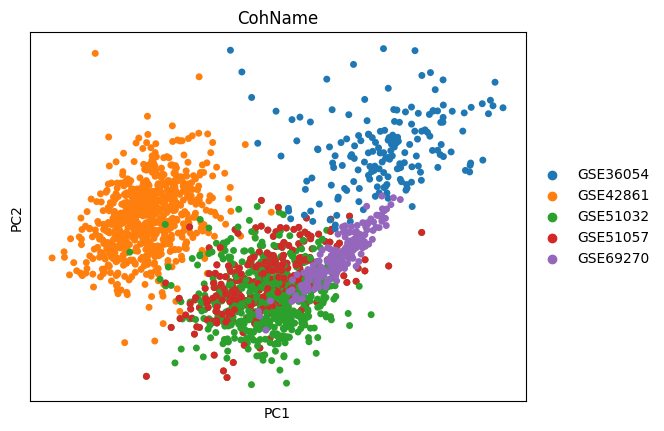

In [ ]:
sc.tl.pca(dds_leik)
sc.pl.pca(dds_leik, color = 'CohName', size = 100)

#### Previous Analysis
During a previous analysis, a part of the process detected a batch in GSE36054 that was removed from the files above. I've retained this code in case you decide to repeat the analysis from scratch and download all the data yourself.

In [ ]:
result_360054 = pd.merge(result_leik[result_leik['cohort']=='GSE36054_annot.csv'].dropna(axis=1) , ann, how="left", left_index=True, right_index=True)
result_360054=result_360054.dropna(axis=1).drop(columns=['cohort_x','cohort_type_x','Unnamed: 0'])
result_360054

,cg00000957,cg00001583,cg00002028,cg00002837,cg00003287,cg00008647,cg00011717,cg00021933,cg00026222,cg00027570,...,cg27662611,CohName,cohort_ty2,cell type,cohort_y,cohort_type_y,group,sentrix id,sentrix position,experiment
index,,,,,,,,,,,,,,,,,,,,,
GSM879994,0.83539,0.23770,0.07205,0.53434,0.08002,0.21738,0.84524,0.89856,0.13554,0.67871,...,0.09013,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Ctrl,5.771710e+09,R01C01,1.0
GSM879995,0.87894,0.06964,0.08470,0.45585,0.21518,0.17258,0.90977,0.88509,0.10395,0.50183,...,0.10092,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib.female,5.771710e+09,R02C01,1.0
GSM879996,0.87176,0.06065,0.06449,0.35902,0.15832,0.10219,0.90217,0.88991,0.09824,0.64636,...,0.10696,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,5.771710e+09,R03C01,1.0
GSM879997,0.88684,0.06388,0.08756,0.46851,0.17533,0.12817,0.92515,0.90354,0.10525,0.60646,...,0.10327,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib.female,5.771710e+09,R04C01,1.0
GSM879998,0.87374,0.07049,0.06019,0.42493,0.18497,0.10259,0.92456,0.90323,0.09835,0.57215,...,0.10913,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,5.771710e+09,R05C01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM880181,0.91087,0.05415,0.04705,0.37778,0.14635,0.08033,0.93615,0.91142,0.07389,0.68595,...,0.07155,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,6.229017e+09,R02C02,3.0
GSM880182,0.90175,0.04742,0.05114,0.45287,0.12120,0.13897,0.93746,0.90687,0.06463,0.60933,...,0.07325,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,6.229017e+09,R03C02,3.0
GSM880183,0.87862,0.24359,0.05415,0.54569,0.06647,0.21388,0.87525,0.94404,0.11875,0.70373,...,0.08000,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Ctrl,6.229017e+09,R04C02,3.0


In [ ]:
ann_list = ['CohName',
 'cohort_ty2',
 'cell type',
 'cohort_y',
 'cohort_type_y',
 'group',
 'sentrix id',
 'sentrix position',
 'experiment']

In [ ]:
result_360054[ann_list]

,CohName,cohort_ty2,cell type,cohort_y,cohort_type_y,group,sentrix id,sentrix position,experiment
index,,,,,,,,,
GSM879994,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Ctrl,5.771710e+09,R01C01,1.0
GSM879995,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib.female,5.771710e+09,R02C01,1.0
GSM879996,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,5.771710e+09,R03C01,1.0
GSM879997,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib.female,5.771710e+09,R04C01,1.0
GSM879998,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,5.771710e+09,R05C01,1.0
...,...,...,...,...,...,...,...,...,...
GSM880181,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,6.229017e+09,R02C02,3.0
GSM880182,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Harvard.Sib,6.229017e+09,R03C02,3.0
GSM880183,GSE36054,leiko,leukocyte,GSE36054_annot.csv,leiko,Ctrl,6.229017e+09,R04C02,3.0


In [ ]:
dds_360054 = DeseqDataSet(
    counts=np.round(result_360054.drop(columns=ann_list)*100),
    metadata=result_360054[ann_list],
    design_factors='experiment',
    refit_cooks=True)

In [ ]:
dds_360054.var_names

Index(['cg00000957', 'cg00001583', 'cg00002028', 'cg00002837', 'cg00003287',
       'cg00008647', 'cg00011717', 'cg00021933', 'cg00026222', 'cg00027570',
       ...
       'cg27592453', 'cg27598806', 'cg27601574', 'cg27611781', 'cg27614432',
       'cg27634071', 'cg27656573', 'cg27657363', 'cg27657537', 'cg27662611'],
      dtype='object', length=222114)

/opt/conda/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


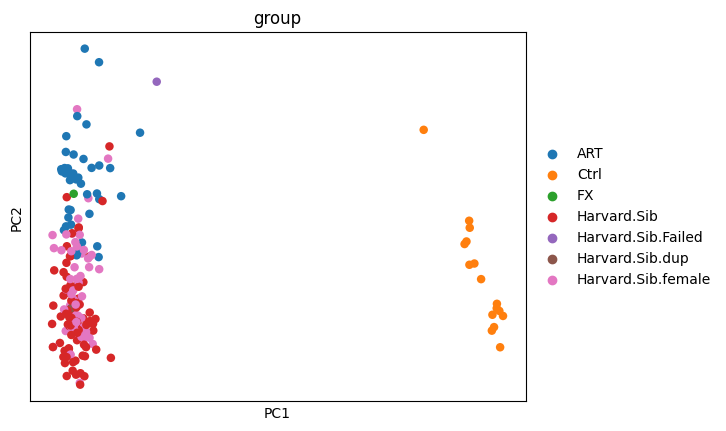

In [ ]:
sc.tl.pca(dds_360054)
sc.pl.pca(dds_360054, color = 'group', size = 150)

In [ ]:
dds_360054_2 = DeseqDataSet(
    counts=np.round(result_360054.drop(columns=ann_list)*100),
    metadata=result_360054[ann_list],
    design_factors='group',
    refit_cooks=True)

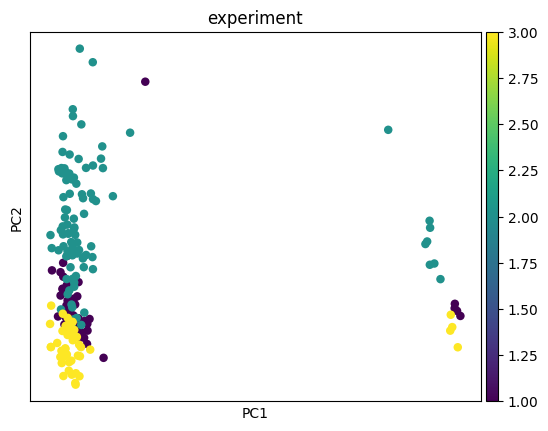

In [ ]:
sc.tl.pca(dds_360054_2)
sc.pl.pca(dds_360054_2, color = 'experiment', size = 150)

# Batch effect correction
This was performed to eliminate the technical batch effect across different cohorts

##  Combat for PBMC data

In [ ]:
pip install combat

Create batch number for each dataset

In [ ]:
batch=[]
datasets = result_leik['cohort'].unique()
for j in range(len(datasets)):
    print(j)
    batch.extend([j for _ in range(len(result_leik[result_leik['cohort']== datasets[j]].index))])

Make correction

In [ ]:
from combat.pycombat import pycombat
data_corrected = pycombat(result_leik.drop(columns=['cohort_ty2',
 'CohName',
 'cohort_type',
 'cohort']).T,batch)

In [ ]:
data_corrected = data_corrected.T

In [ ]:
data_corrected_merged = pd.merge(data_corrected.dropna(axis=1) , ann[['cohort_type','cohort', 'disease state', 'tissue']], how="left", left_index=True, right_index=True)

In [ ]:
col_ann=['cohort_type',
 'cohort',
 'disease state',
 'tissue',
 'CohName',
 'cohort_ty2']

In [ ]:
data_corrected_merged['CohName'] = data_corrected_merged['cohort'].str[:8]
data_corrected_merged['cohort_ty2'] = data_corrected_merged['cohort_type']

In [ ]:
dds_leik_norm = DeseqDataSet(
    counts=np.round(np.abs(data_corrected_merged.drop(columns=col_ann))*100),
    metadata=data_corrected_merged[col_ann],
    design_factors="cohort",
    refit_cooks=True)

In [ ]:
sc.tl.pca(dds_leik_norm)
sc.pl.pca(dds_leik_norm, color = 'CohName', size = 100)

Unfortunately, the pictures after applying Combat were deleted, and recalculating them in this notebook is challenging due to its requirement of approximately 32GB of memory and slow performance, mainly because of the large dataset. Therefore, I've included an example picture obtained earlier from the notebook on the server in the next cell

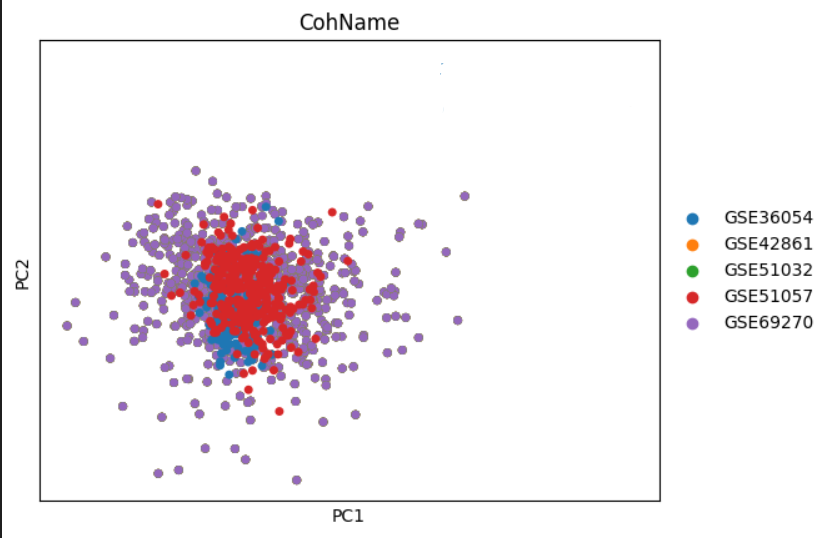

No batch effect was detected after applying Combat correction

Uncomment the next cell if you wish to save the data corrected by Combat

In [ ]:
# data_corrected_merged.to_csv('normalized_leik_expr.csv')

##  Combat for whole blood data

In [ ]:
result_blood = result[result['cohort_type']!='leiko']
batch=[]
datasets = result_blood['cohort'].unique()
for j in range(len(datasets)):
    print(j)
    batch.extend([j for _ in range(len(result_blood[result_blood['cohort']== datasets[j]].index))])

In [ ]:
result_blood.columns[::-1]

In [ ]:
from combat.pycombat import pycombat
data_corrected = pycombat(result_blood.drop(columns=['cohort_ty2',
 'CohName',
 'cohort_type',
 'cohort']).T,batch)
data_corrected = data_corrected.T

In [ ]:
data_corrected_merged2 = pd.merge(data_corrected.dropna(axis=1) , ann[['cohort_type','cohort', 'disease state', 'tissue']], how="left", left_index=True, right_index=True)
data_corrected_merged2

In [ ]:
col_ann=['cohort_type',
 'cohort',
 'disease state',
 'tissue',
 'CohName',
 'cohort_ty2']
data_corrected_merged2['CohName'] = data_corrected_merged2['cohort'].str[:8]
data_corrected_merged2['cohort_ty2'] = data_corrected_merged2['cohort_type']
data_corrected_merged2['CohName']

In [ ]:
dds_blood_norm = DeseqDataSet(
    counts=np.round(np.abs(data_corrected_merged2.drop(columns=col_ann))*100),
    metadata=data_corrected_merged2[col_ann],
    design_factors="cohort",
    refit_cooks=True)

In [ ]:
sc.tl.pca(dds_blood_norm)
sc.pl.pca(dds_blood_norm, color = 'CohName', size = 100)

No batch effect was detected after applying Combat correction

Uncomment the next cell if you wish to save the data corrected by Combat

In [ ]:
# data_corrected_merged2.to_csv('normalized_whole_blood_expr.csv')

#### Combat Correction for All Data
This was performed to verify and recalculate if necessary.

In [ ]:
whole=pd.concat([data_corrected_merged,data_corrected_merged2])
whole.head()

In [ ]:
dds_ALLDATA_norm = DeseqDataSet(
    counts=np.round(np.abs(whole.drop(columns=col_ann))*100),
    metadata=whole[col_ann],
    design_factors="cohort",
    refit_cooks=True)

After completing all these steps, I selected the most representative dataset GSE42861 and narrowed down the CpGs to exclude those associated with age. This reduction was necessary because the initial quantity of CpGs was too large, and further work with it could be slow

# Selecting only CpGs that differ in GSE42861

In [ ]:
df = pd.read_csv('.data/CpG/processed/GSE42861_expressions.csv', index_col='ID_REF')

In [ ]:
df.head()

,GSM1051525,GSM1051526,GSM1051527,GSM1051528,GSM1051529,GSM1051530,GSM1051531,GSM1051532,GSM1051533,GSM1051534,...,GSM1052204,GSM1052205,GSM1052206,GSM1052207,GSM1052208,GSM1052209,GSM1052210,GSM1052211,GSM1052212,GSM1052213
ID_REF,,,,,,,,,,,,,,,,,,,,,
cg00050873,0.607563,0.345054,0.321350,0.277268,0.413599,0.622860,0.409273,0.386916,0.830905,0.820439,...,0.476900,0.454220,0.534386,0.500398,0.486101,0.493574,0.505228,0.484479,0.480320,0.414542
cg00212031,0.422843,0.568662,0.360909,0.304437,0.131251,0.501685,0.378416,0.272604,0.301801,0.028893,...,0.527407,0.405823,0.517726,0.394434,0.709992,0.445065,0.615518,0.442768,0.457317,0.336448
cg00213748,0.372455,0.500600,0.352732,0.475235,0.367545,0.263227,0.242161,0.425061,0.849974,0.884066,...,0.403000,0.369366,0.439931,0.457935,0.447113,0.533659,0.497236,0.413929,0.615977,0.472060
cg00214611,0.621562,0.498607,0.373824,0.486258,0.761167,0.415746,0.279939,0.351245,0.031347,0.032633,...,0.421326,0.484291,0.541542,0.583408,0.503563,0.529222,0.517113,0.462410,0.482462,0.459981
cg00455876,0.290777,0.374591,0.230674,0.295181,0.235770,0.475189,0.234222,0.413535,0.814698,0.850011,...,0.401079,0.240160,0.379362,0.325399,0.322756,0.368681,0.304205,0.354276,0.325684,0.504763


In [ ]:
df_annot = pd.read_csv('.data/CpG/processed/GSE42861_annot.csv', index_col='GSM')
df_annot

,cell type,disease state,subject,age,gender,smoking status
GSM,,,,,,
GSM1051525,PBL,rheumatoid arthritis,Patient,67,f,current
GSM1051526,PBL,rheumatoid arthritis,Patient,49,f,current
GSM1051527,PBL,rheumatoid arthritis,Patient,53,f,ex
GSM1051528,PBL,rheumatoid arthritis,Patient,62,f,current
GSM1051529,PBL,rheumatoid arthritis,Patient,33,f,never
...,...,...,...,...,...,...
GSM1052209,PBL,Normal,Normal,63,f,ex
GSM1052210,PBL,Normal,Normal,63,f,never
GSM1052211,PBL,Normal,Normal,46,f,never


In [ ]:
df_annot.age.max()

70

In [ ]:
df_annot.age.min()

18

In [ ]:
df_all_annot = pd.read_csv('.data/CpG/processed/metaannot.csv', index_col='GSM')

Plot a few CpGs to observe the relationships between CpGs and age

In [ ]:
subdf = df_annot[['age']].join(df.loc['cg00212031'])

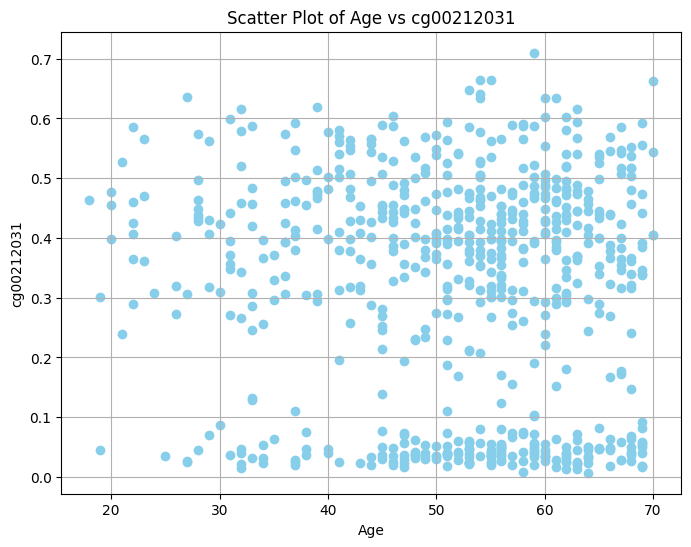

In [ ]:
subdf = df_annot[['age']].join(df.loc['cg00212031'])
plt.figure(figsize=(8, 6))
plt.scatter(subdf['age'], subdf['cg00212031'], color='skyblue')
plt.title('Scatter Plot of Age vs cg00212031')
plt.xlabel('Age')
plt.ylabel('cg00212031')
plt.grid(True)
plt.show()


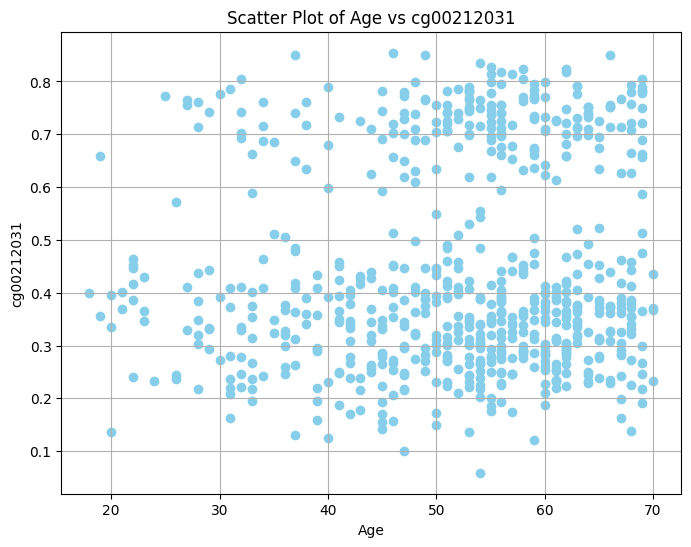

In [ ]:
subdf = df_annot[['age']].join(df.loc['cg00455876'])
plt.figure(figsize=(8, 6))
plt.scatter(subdf['age'], subdf['cg00455876'], color='skyblue')
plt.title('Scatter Plot of Age vs cg00455876')
plt.xlabel('Age')
plt.ylabel('cg00212031')
plt.grid(True)
plt.show()

In [ ]:
df_with_age = df.T.join(df_annot['age'])

Plot CpG values averaged across samples

In [ ]:
df_mean = df_with_age.groupby('age').mean()

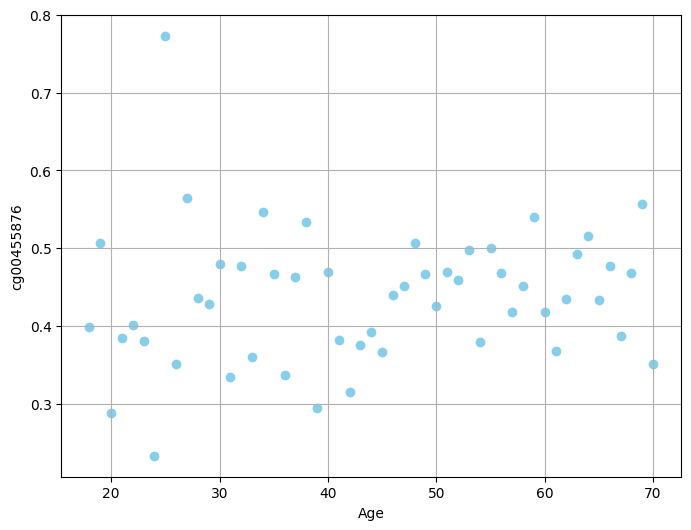

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(dff_mean.index, df_mean['cg00455876'], color='skyblue')
# plt.title('Scatter Plot of Age vs cg00212031')
plt.xlabel('Age')
plt.ylabel('cg00455876')
plt.grid(True)
plt.show()

In [ ]:
df_mean

,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,...,rs4742386,rs2857639,rs1495031,rs1510480,rs2468330,rs7746156,rs1945975,rs966367,rs877309,rs4331560
age,,,,,,,,,,,,,,,,,,,,,
18,0.483256,0.463237,0.404586,0.533372,0.399074,0.254019,0.185892,0.542018,0.293529,0.265660,...,0.074360,0.089179,0.951358,0.432374,0.046282,0.933003,0.935689,0.098843,0.523417,0.469074
19,0.599577,0.172861,0.487275,0.392283,0.507309,0.167664,0.084216,0.762975,0.764410,0.200066,...,0.560995,0.710078,0.722373,0.496699,0.494300,0.478751,0.520762,0.495566,0.272729,0.488051
20,0.505009,0.443508,0.348278,0.404373,0.288855,0.294734,0.206599,0.468080,0.407995,0.371205,...,0.359130,0.549625,0.949713,0.761719,0.194992,0.632030,0.662076,0.484831,0.667823,0.614470
21,0.387809,0.382892,0.393187,0.508520,0.384975,0.206345,0.277789,0.351276,0.392741,0.299279,...,0.478048,0.316403,0.715757,0.499743,0.268971,0.493778,0.510220,0.498349,0.258187,0.696069
22,0.419789,0.421731,0.405253,0.436590,0.401012,0.277603,0.281747,0.454895,0.434404,0.356072,...,0.696700,0.456703,0.262421,0.392062,0.274286,0.416925,0.424397,0.430441,0.433299,0.337760
23,0.473341,0.465954,0.439788,0.472674,0.380374,0.276161,0.248906,0.411748,0.452376,0.332771,...,0.379302,0.409332,0.331477,0.598100,0.511004,0.789586,0.796443,0.246129,0.807571,0.493461
24,0.469390,0.308600,0.393374,0.138640,0.233332,0.245394,0.167085,0.362724,0.380671,0.249200,...,0.532298,0.126124,0.478941,0.926977,0.928780,0.040352,0.523205,0.450843,0.024774,0.038543
25,0.828544,0.034614,0.900210,0.024751,0.773106,0.060296,0.028701,0.959872,0.969596,0.025036,...,0.518977,0.081665,0.045560,0.915022,0.048352,0.051102,0.501013,0.856313,0.523142,0.452149
26,0.445509,0.331730,0.513247,0.517080,0.351209,0.213917,0.144990,0.538517,0.279574,0.299563,...,0.517455,0.406004,0.791480,0.609333,0.641837,0.336952,0.801745,0.192048,0.662516,0.324417


Next, identify age bins to retain only CpGs that exhibit differences within these ranges

In [ ]:

age_bins = [18, 27, 30, 35, 40, 45, 60]

df_with_age['age_range'] = pd.cut(df_with_age['age'], bins=age_bins, labels=['18-27', '27-30', '30-35', '35-40', '40-45', '45-60'])
mean_by_range = df_with_age.groupby('age_range').mean()
mean_by_range.drop(columns=['age'], inplace=True)
mean_by_range


,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,cg02004872,cg02011394,cg02050847,cg02233190,...,rs4742386,rs2857639,rs1495031,rs1510480,rs2468330,rs7746156,rs1945975,rs966367,rs877309,rs4331560
age_range,,,,,,,,,,,,,,,,,,,,,
18-27,0.511007,0.348116,0.466494,0.397018,0.420745,0.225060,0.193116,0.539762,0.495426,0.286088,...,0.511019,0.467707,0.544946,0.576010,0.388077,0.489521,0.628990,0.405292,0.524355,0.463936
27-30,0.543999,0.370833,0.510034,0.385696,0.441726,0.232877,0.186331,0.571924,0.489132,0.286076,...,0.532945,0.448790,0.507430,0.491932,0.333209,0.461228,0.615419,0.427766,0.455940,0.513241
30-35,0.532528,0.289155,0.485141,0.359852,0.426170,0.207451,0.130830,0.595515,0.535516,0.235637,...,0.597806,0.557765,0.617718,0.539392,0.332686,0.513358,0.539619,0.488128,0.402328,0.511548
35-40,0.541324,0.359250,0.481660,0.384583,0.411800,0.227873,0.175807,0.572660,0.487420,0.253877,...,0.518451,0.550722,0.542244,0.473503,0.496220,0.456995,0.588519,0.441449,0.429928,0.552919
40-45,0.487445,0.369701,0.462210,0.396458,0.365556,0.239763,0.170475,0.523486,0.450876,0.263114,...,0.536190,0.431723,0.436745,0.459643,0.417757,0.574164,0.655966,0.527011,0.427284,0.592307
45-60,0.577397,0.296743,0.537430,0.330288,0.460507,0.207479,0.151299,0.621879,0.564102,0.225238,...,0.513565,0.475440,0.532032,0.533733,0.432684,0.525015,0.587696,0.463659,0.472732,0.502869


After testing a 10% threshold, only 1224 CpGs were retained. Therefore, I decided to set the threshold at 5%

In [ ]:
diff = mean_by_range.max(axis=0) - mean_by_range.min(axis=0)
sum(diff>0.1)

1224

In [ ]:
diff[diff>0.05]

cg00050873    0.089952
cg00212031    0.081678
cg00213748    0.075221
cg00214611    0.066730
cg00455876    0.094950
                ...   
rs7746156     0.117169
rs1945975     0.116347
rs966367      0.121719
rs877309      0.122027
rs4331560     0.128371
Length: 16122, dtype: float64

In [ ]:
cpg_to_stay = diff[diff>0.05].index.to_list()

In [ ]:
metaexpr.head() # data with all CpGs

ID_REF,cg00000957,cg00001583,cg00003287,cg00021933,cg00026222,cg00027570,cg00038675,cg00040446,cg00113194,cg00114008,...,cg27506210,cg27519579,cg27523577,cg27528247,cg27552198,cg27575890,cg27598806,cg27634071,cg27657363,cg27657537
index,,,,,,,,,,,,,,,,,,,,,
GSM1051525,0.870997,0.121106,0.210955,0.903692,0.090213,0.636357,0.649931,0.055412,0.828086,0.123508,...,0.760789,0.760569,0.336073,0.808012,0.872007,0.423205,0.873601,0.096663,0.777684,0.105685
GSM1051526,0.873762,0.088960,0.244844,0.908856,0.084529,0.573933,0.648017,0.065712,0.823899,0.118023,...,0.768506,0.803368,0.344591,0.805337,0.888213,0.424718,0.871823,0.083777,0.801834,0.119247
GSM1051527,0.859750,0.072046,0.209858,0.883683,0.086311,0.768327,0.708501,0.059934,0.841061,0.107615,...,0.753416,0.761339,0.329990,0.836789,0.856068,0.383205,0.878550,0.096869,0.762175,0.099923
GSM1051528,0.870620,0.103984,0.209724,0.912712,0.081393,0.571648,0.666859,0.074976,0.851469,0.127926,...,0.756170,0.817588,0.365057,0.827779,0.866548,0.405542,0.882510,0.120769,0.773367,0.093272
GSM1051529,0.855005,0.067412,0.197101,0.912549,0.077056,0.535395,0.546480,0.068813,0.838024,0.106273,...,0.732696,0.814171,0.364775,0.798188,0.849016,0.453249,0.870242,0.107000,0.809349,0.127895


erify that the metacohort retains all CpGs filtered by the chosen dataset's threshold criteria

In [ ]:
cpg_to_stay_series = pd.Series(cpg_to_stay)

result = cpg_to_stay_series.isin(metaexpr.columns)

In [ ]:
filtered_cpg_to_stay = [cpg_to_stay[i] for i, is_in in enumerate(result) if is_in]

In [ ]:
len(filtered_cpg_to_stay)

3055

# Save Data
It's time to save all data that could be used in further analysis.

The most important - filtered_cpg_to_stay.csv and filteredCpG_corrected_leiko_03042024.csv

In [ ]:
data_corrected = data_corrected.T

In [ ]:
pd.DataFrame(filtered_cpg_to_stay).to_csv('filtered_cpg_to_stay.csv')

In [ ]:
data_corrected[filtered_cpg_to_stay].to_csv('filterd_CpG_leiko_corrected_12032024.csv')

In [ ]:
filtered_corrected_leiko = data_corrected_merged[filtered_cpg_to_stay]

In [ ]:
filtered_corrected_leiko.to_csv('filteredCpG_corrected_leiko_03042024.csv')

In [ ]:
filtered_NOTcorrected_leiko=result_leik[filtered_cpg_to_stay]
filtered_NOTcorrected_leiko.to_csv('filteredCpG_NOTcorrected_leiko_03042024.csv')

In [ ]:
filtered_NOTcorrected_wholedata=metaexpr[filtered_cpg_to_stay]
filtered_NOTcorrected_wholedata.to_csv('filteredCpG_NOTcorrected_ALLDATA_03042024.csv')